In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["font.size"] = 18



In [16]:
steam_df = pd.read_csv("Data/steam/games-features-edit.csv")


1              Team Fortress Classic
2                      Day of Defeat
3                 Deathmatch Classic
4          Half-Life: Opposing Force
5                           Ricochet
                    ...             
12619                   ObserVR Beta
12620                One Night Stand
12621    Fiber Twig: Midnight Puzzle
12622               Charm Tale Quest
12623            What The Heck Dude?
Name: ResponseName, Length: 12092, dtype: object
12624
1830
2267


C:\Users\mattp\AppData\Local\Temp\ipykernel_19100\1298185134.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recvsmeta_df = recvsmeta_df[steam_df['RecommendationCount'] != 0]


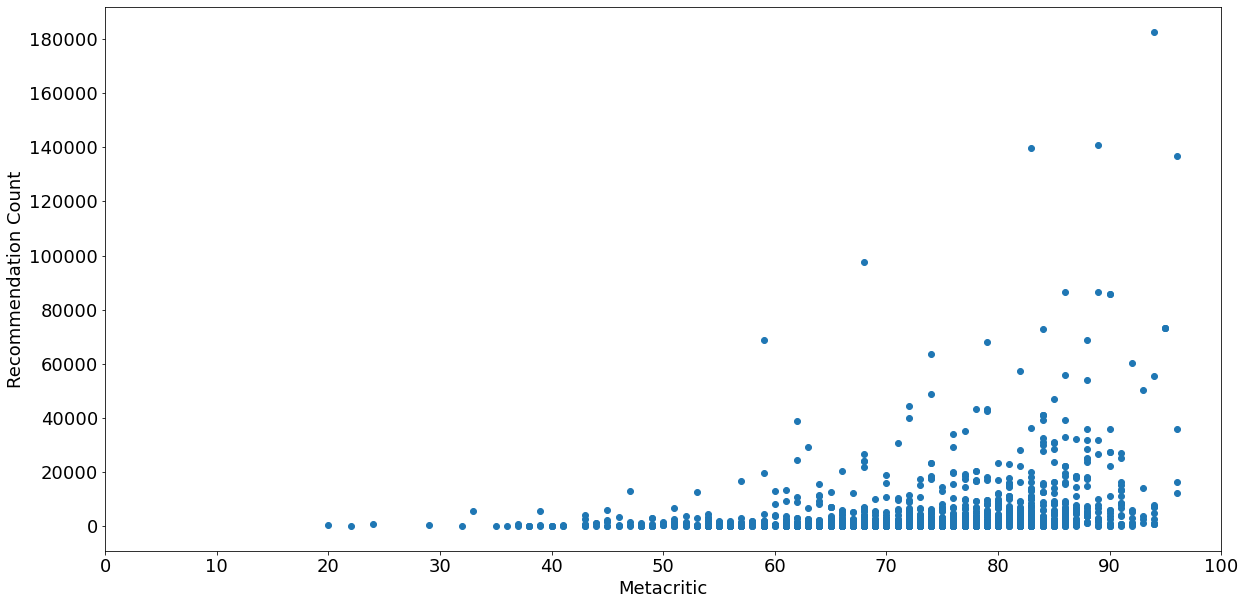

In [17]:
#remove rows with missing or 0 values in metacritic, price, and recommendationcount
recvsmeta_df = steam_df.dropna(subset=['Metacritic'])
recvsmeta_df = recvsmeta_df[steam_df['Metacritic'] != 0]
pricevsmeta_df = recvsmeta_df.dropna(subset=['PriceInitial'])
recvsmeta_df = recvsmeta_df.dropna(subset=['RecommendationCount'])
recvsmeta_df = recvsmeta_df[steam_df['RecommendationCount'] != 0]

recvsmeta_df = recvsmeta_df[recvsmeta_df['GenreIsNonGame'] == 0]

test_df = steam_df[steam_df['RecommendationCount'] < 5000]

print(test_df['ResponseName'])

print(len(steam_df))
print(len(recvsmeta_df))
print(len(pricevsmeta_df))

#set figure size for all plots
plt.rcParams["figure.figsize"] = (20, 10)
#plot metacritic vs recommendation count
recvsmeta_df = recvsmeta_df[(recvsmeta_df['RecommendationCount'] < 200000)]
plt.scatter(recvsmeta_df['Metacritic'], recvsmeta_df['RecommendationCount'])
plt.xlabel('Metacritic')
plt.ylabel('Recommendation Count')
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 200000, 20000))
plt.show()


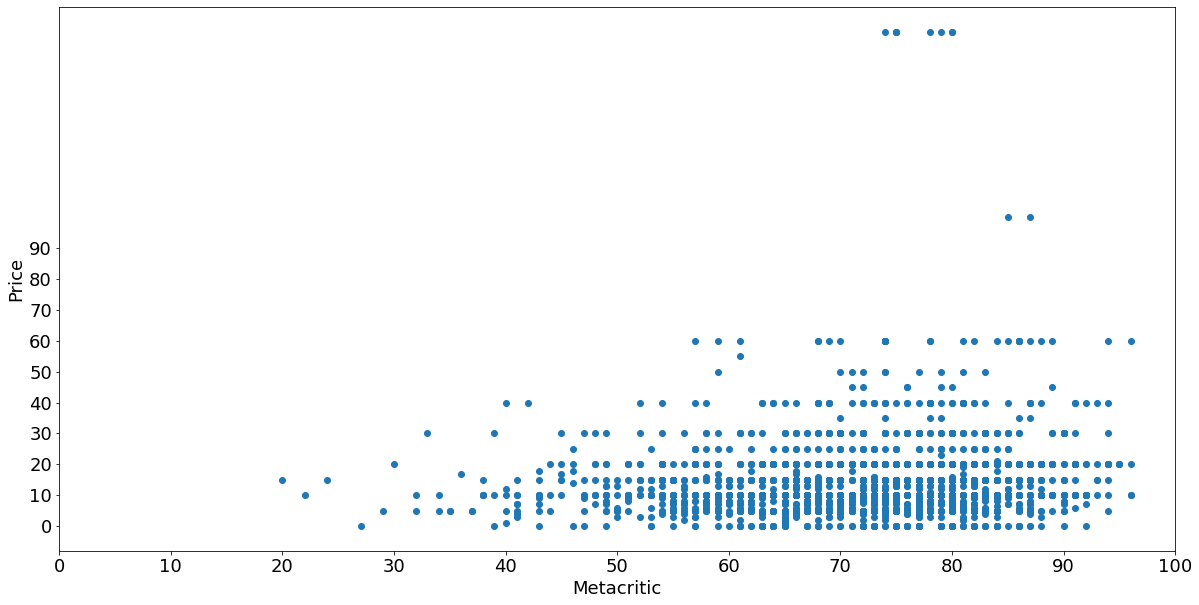

In [18]:
#plot metacritic vs price
plt.scatter(pricevsmeta_df['Metacritic'], pricevsmeta_df['PriceInitial'])
plt.xlabel('Metacritic')
plt.ylabel('Price')
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 100, 10))
plt.show()

266


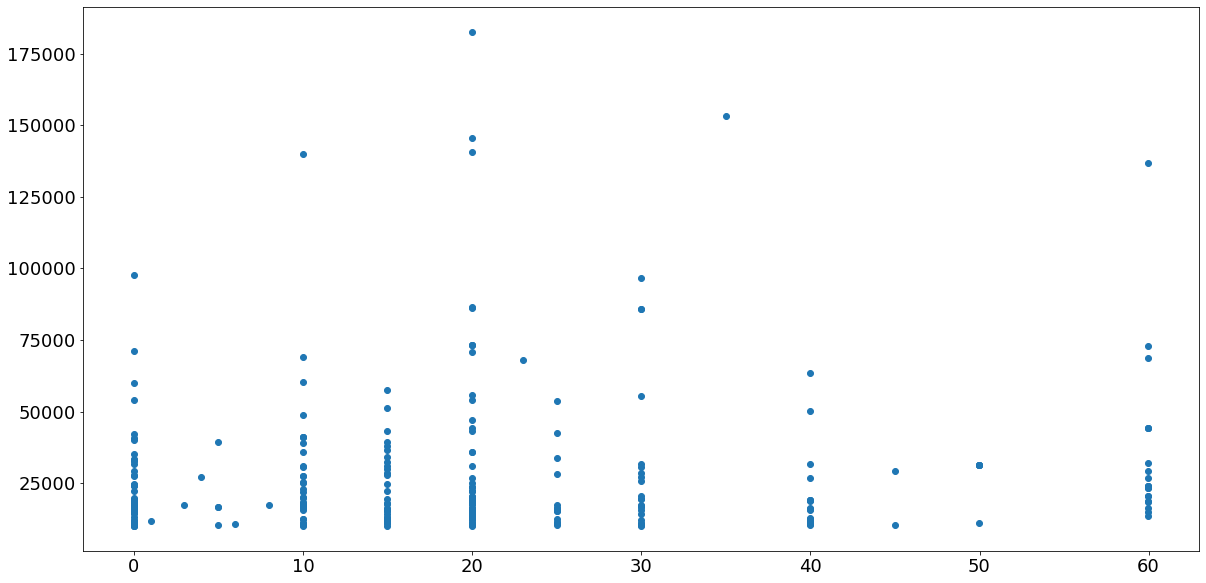

In [19]:
#price vs recommendation count
pricevsrec_df = steam_df[(steam_df['RecommendationCount'] < 200000) & (steam_df['PriceInitial'] < 100) & (steam_df['RecommendationCount'] > 10000)]
pricevsrec_df = pricevsrec_df.dropna(subset=['PriceInitial', 'RecommendationCount'])
print(len(pricevsrec_df))
plt.scatter(pricevsrec_df['PriceInitial'], pricevsrec_df['RecommendationCount'])

Training Data:
Mean squared error:  142958597.24885175
R^2:  0.06687405323706963

Testing Data:
Mean squared error:  68931267.49441485
R^2:  -0.01149000882045148

Coefficient:  [[283.54510996]]
Intercept:  [-16143.81418788]


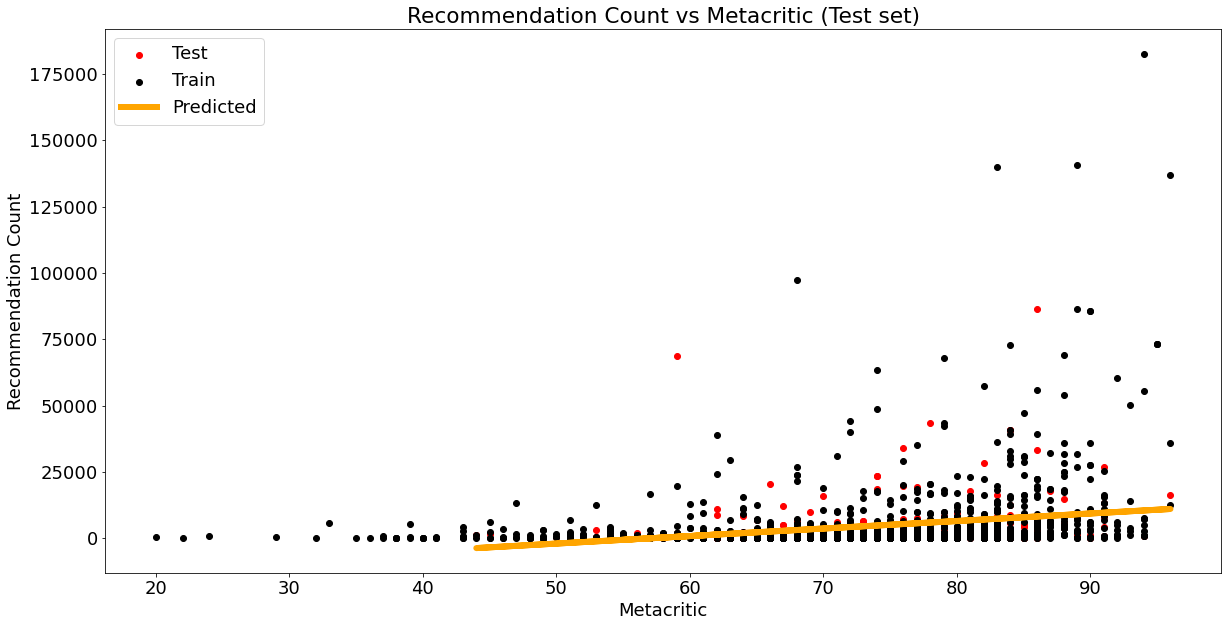

Mean Absolute Error: 4867.107235754392
Mean Squared Error: 68931267.49441485
Root Mean Squared Error: 8302.485621451859


In [20]:
#split recvsmeta_df into train and test sets
X = recvsmeta_df['Metacritic'].values.reshape(-1, 1)
y = recvsmeta_df['RecommendationCount'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)
print("Training Data:")
print("Mean squared error: ", mean_squared_error(y_train, y_pred))
print("R^2: ", r2_score(y_train, y_pred))

y_pred = regressor.predict(X_test)
print("\nTesting Data:")
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))

print("\nCoefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

#plot results
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_train, color='black')
plt.plot(X_test, y_pred, color='orange', linewidth=6)
plt.legend(['Test', 'Train', 'Predicted'])
plt.title('Recommendation Count vs Metacritic (Test set)')
plt.xlabel('Metacritic')
plt.ylabel('Recommendation Count')
plt.show()

#calculate accuracy
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


